In [1]:
config_name = "debug_config.yaml"
from reuploadingmodel import ReuploadingModel
from resultssaver import ResultsSaver
from epsilon_utils import *

from statisticsreuploading import (
    SimulationStatisticsCoefficients,
    TheoreticalStatisticsCoefficients,
)
from resultsvisualization import ResultsVisualization

In [ ]:
model = ReuploadingModel(
    dev="default.qubit",
    encoding="pauli_encoding",
    diff_generator_per_layer=False,
    ansatz="StronglyEntangling",
    cost="global",
    qubit_measured=0,
    n_qubits=4,
    n_samples=3000,
    n_encoding_qubits=4,
    n_periodic_layers=1,
    n_circuit_layers=1,
    m_subgroups=1,
    sub_l=1,  # must be different from 0
    m_wires=1,
)  # If an argument is not taken into account in the ansatz or measurement strategy, it is not used.
simu = SimulationStatisticsCoefficients(model)
theo = TheoreticalStatisticsCoefficients(
    model,
    bool_calculate_epsilon=False,
)
plots = ResultsVisualization(model, simu, theo)
ResultsSaver(model, simu, theo).save_variables()

/Users/marioherreroglez/Desktop/DRM_fourier_expressivity/statisticsreuploading.py:92: RuntimeWarning: Epsilon not calculated. Using maximum value of 2^(2n)
  warnings.warn(


In [3]:
model.circuit_diagram()

0: ──Rot─╭●───────╭X──Rot─╭●────╭X──Rot──────╭●─╭X──Rot──────╭●─────────╭X──Rot─╭●────╭X──RX(0.10,"s_0")──Rot─────────────────╭●───────╭X──Rot─╭●────╭X──Rot──────╭●─╭X──Rot──────╭●─────────╭X──Rot─╭●────╭X────┤ ╭Probs
1: ──Rot─╰X─╭●────│───Rot─│──╭●─│──╭X────Rot─│──╰●─╭X────Rot─╰X───╭●────│───Rot─│──╭●─│──╭X───────────────RX(0.10,"s_0")──Rot─╰X─╭●────│───Rot─│──╭●─│──╭X────Rot─│──╰●─╭X────Rot─╰X───╭●────│───Rot─│──╭●─│──╭X─┤ ├Probs
2: ──Rot────╰X─╭●─│───Rot─╰X─│──╰●─│─────Rot─│─────╰●───╭X────Rot─╰X─╭●─│───Rot─╰X─│──╰●─│────────────────RX(0.10,"s_0")──Rot────╰X─╭●─│───Rot─╰X─│──╰●─│─────Rot─│─────╰●───╭X────Rot─╰X─╭●─│───Rot─╰X─│──╰●─│──┤ ├Probs
3: ──Rot───────╰X─╰●──Rot────╰X────╰●────Rot─╰X─────────╰●────Rot────╰X─╰●──Rot────╰X────╰●───────────────RX(0.10,"s_0")──Rot───────╰X─╰●──Rot────╰X────╰●────Rot─╰X─────────╰●────Rot────╰X─╰●──Rot────╰X────╰●─┤ ╰Probs


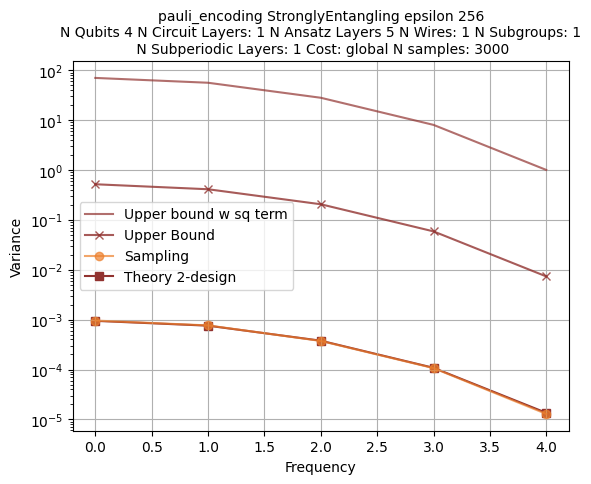

In [5]:
plots.plot_var_abs_coeffs_bounds(var_log_scale=True)